<a href="https://colab.research.google.com/github/SebastianLore/SebastianLore.github.io/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2: Exploratory data analysis and visualization

UIC CS 418, Spring 2024

**Academic Integrity Policy**: According to the Academic Integrity Policy of this course, all work submitted for grading must be done individually, unless otherwise specified. While we encourage you to talk to your peers and learn from them, this interaction must be superficial with regards to all work submitted for grading. This means you cannot work in teams, you cannot work side-by-side, you cannot submit someone else’s work (partial or complete) as your own. In particular, note that you are guilty of academic dishonesty if you extend or receive any kind of unauthorized assistance. Absolutely no transfer of program code between students is permitted (paper or electronic), and you may not solicit code from family, friends, or online forums. Other examples of academic dishonesty include emailing your program to another student, copying-pasting code from the internet, working in a group on a homework assignment, and allowing a tutor, TA, or another individual to write an answer for you. Academic dishonesty is unacceptable, and penalties range from failure to expulsion from the university; cases are handled via the official student conduct process described at https://dos.uic.edu/community-standards/academic-integrity/

This homework is an individual assignment for all graduate students. Undergraduate students are allowed to work in pairs to discuss and share ideas with each other, but you still need to work and submit homework by yourself. **Identical submissions are not allowed**. The pairs of students who choose to work together still need to abide by the **Academic Integrity Policy** and not share or receive help from others (except each other).

There are three parts in this homework. The zero one is a practice introduction to `matplotlib` (5%). The first part is a guided exploration of a bikeshare dataset (40%). The second one is a self-guided exploration of a dataset on social media and internet attitudes (45%). Third part deals with understanding of loss functions (10%). You can also earn extra credit of 10%.


## Due Date

This assignment is due at 11:59pm Saturday, Feb 24th. Late submissions will not be considered.


## Submission Instruction

You need to complete all code and answer all questions denoted by **Q#** in this notebook. After executing all commands and completing this notebook, export/convert your *hw2.ipynb* to a **pdf** file and upload it to Gradescope under *Homework 2 (pdf)*. Make sure you check that your **pdf** file includes all parts of your solution **(including the outputs)**. Check `warmup.pdf` for an example of expected submission file. You are also reqired to submit your **.iypnb** file to the *Homework 2 (code)* section with all the output visibile in the output cells.

**Note**:
When you submit the solution to Gradescope, it is necessary that you **mark/tag all pages of each solution to its question based on the homework outline**, so that it can be easily found. You may lose marks if you don't mark your solutions.

In [ ]:
%pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Practice: `matplotlib` (5%)

[`matplotlib`][mpl] is the most widely used plotting library available for Python. It comes with a good amount of out-of-the-box functionality and is highly customizable. Most other plotting libraries in Python provide simpler ways to generate complicated `matplotlib` plots, including `seaborn`, so it's worth learning a bit about `matplotlib` now.

Notice how all of our notebooks have lines that look like:

	%matplotlib inline
	import matplotlib.pyplot as plt

The `%matplotlib inline` magic command tells `matplotlib` to render the plots
directly onto the notebook (by default it will open a new window with the plot).

Then, the `import` line lets us call `matplotlib` functions using `plt.<func>`

Here's a graph of `sin(x)` from 0 to 2 * pi.

[mpl]: http://matplotlib.org/

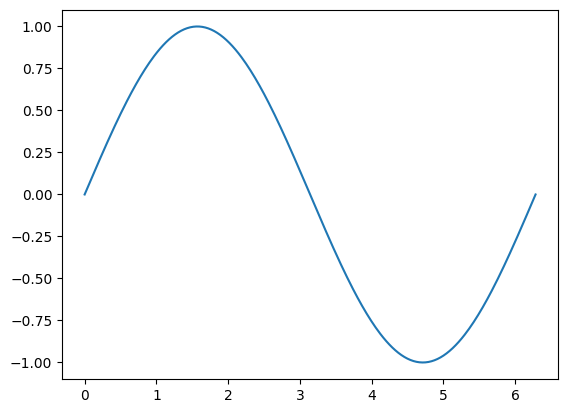

In [54]:
# Set up (x, y) pairs from 0 to 2*pi
xs = np.linspace(0, 2 * np.pi, 300)
ys = np.sin(xs)

# plt.plot takes in x-values and y-values and plots them as a line
plt.plot(xs, ys)

`matplotlib` also conveniently has the ability to plot multiple things on the same plot. Just call `plt.plot` multiple times in the same cell:

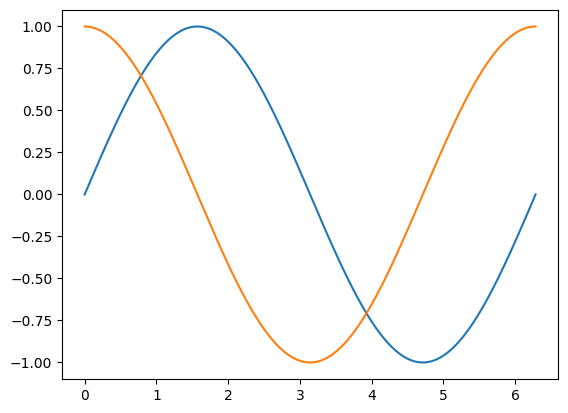

In [55]:
plt.plot(xs, ys)
plt.plot(xs, np.cos(xs))

That plot looks pretty nice but isn't presentation-ready. Luckily, `matplotlib` has a wide array of plot customizations.


## Q0 (5%):

Skim through the first part of the tutorial at https://github.com/rougier/matplotlib-tutorial to create the plot below. There is a lot of extra information there which we suggest
you read on your own time. For now, just look for what you need to make the plot.

Specifically, you'll have to change the x and y limits, add a title, and add a legend.

![](q1.png)

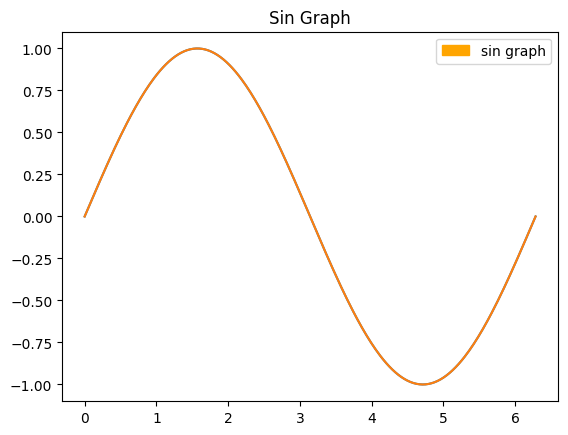

In [57]:
# Here's the starting code from last time. Edit / Add code to create the plot above.
import matplotlib.patches as mpatches

plt.plot(xs, ys)
plt.title("Sin Graph")
plt.plot(xs, np.sin(xs))
red_patch = mpatches.Patch(color='orange', label='sin graph')
plt.legend(handles=[red_patch])

In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Step2: Find the URL - it will look something like below - Now we set the working directory to the folder
%cd "/content/drive/MyDrive/CS 418/HW2_Spring24"
!pwd

Mounted at /content/drive
/content/drive/MyDrive/CS 418/HW2_Spring24
/content/drive/MyDrive/CS 418/HW2_Spring24


# Part 1: Guided EDA of bikeshare trips (40%)

You will be performing some basic EDA (exploratory data analysis) on
bikeshare data in Washington D.C.

The variables in this data frame are defined as:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : whether day is holiday or not
- weekday : day of the week (Sunday to Saturday)
- workingday : if day is neither weekend nor holiday
- weathersit :
    - 1: Clear or partly cloudy
    - 2: Mist + clouds
    - 3: Light Snow or Rain
    - 4: Heavy Rain or Snow
- temp : Normalized temperature in Celsius (divided by 41)
- atemp: Normalized feeling temperature in Celsius (divided by 50)
- hum: Normalized percent humidity (divided by 100)
- windspeed: Normalized wind speed (divided by 67)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including casual and registered

In [58]:
bike_trips = pd.read_csv('bikeshare.csv')

# Here we'll do some pandas datetime parsing so that the dteday column
# contains datetime objects.
bike_trips['dteday'] += ':' + bike_trips['hr'].astype(str)
bike_trips['dteday'] = pd.to_datetime(bike_trips['dteday'], format="%Y-%m-%d:%H")
bike_trips = bike_trips.drop(['yr', 'mnth', 'hr'], axis=1)

bike_trips.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01 00:00:00,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01 01:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01 02:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01 03:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01 04:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Q1.1 (10%):
Explore the `bike_trips` dataframe to answer the following questions.


What time range is represented here?
What was the maximum registration (use the "registered" column) on a SINGLE DAY

Write code in the cell below to perform your exploration.

In [60]:
# your code here

# get the time range
start_date = bike_trips['dteday'].min()
end_date = bike_trips['dteday'].max()
print("time range:", start_date, "to", end_date)

# find maximum registration on a single day
max_registration = bike_trips.groupby(bike_trips['dteday'].dt.date)['registered'].max().max()
print("maximum registration on a single day:", max_registration)

time range: 2011-01-01 00:00:00 to 2012-12-31 23:00:00
maximum registration on a single day: 886


## Using `pandas` to plot

`pandas` provides useful methods on dataframes. For simple plots, we prefer to
just use those methods instead of the `matplotlib` methods since we're often
working with dataframes anyway. The syntax is:

    dataframe.plot.<plotfunc>

Where the `<plotfunc>` is one of the functions listed under _Plotting_ here: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

<Axes: xlabel='dteday'>

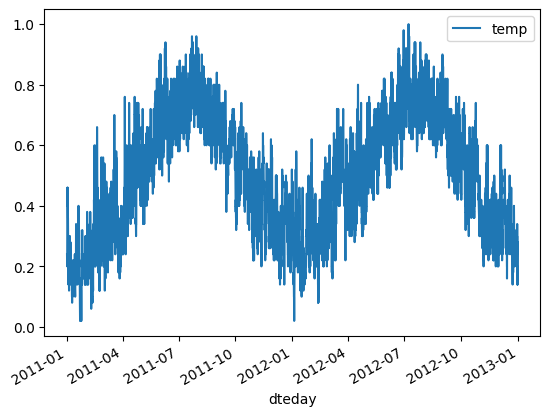

In [61]:
# This plot shows the temperature at each data point
bike_trips.plot.line(x='dteday', y='temp')

## `seaborn`

Now, we'll learn how to use the [`seaborn`][sns] Python library. `seaborn`
is built on top of `matplotlib` and provides many helpful functions
for statistical plotting that `matplotlib` and `pandas` don't have.

Generally speaking, we'll use `seaborn` for more complex statistical plots,
`pandas` for simple plots (eg. line / scatter plots), and
`matplotlib` for plot customization.

Nearly all `seaborn` functions are designed to operate on `pandas`
dataframes. Most of these functions assume that the dataframe is in
a specific format called *long-form*, where each column of the dataframe
is a particular feature and each row of the dataframe a single datapoint.

For example, this dataframe is long-form:

```
   country year avgtemp
 1  Sweden 1994       6
 2 Denmark 1994       6
 3  Norway 1994       3
 4  Sweden 1995       5
 5 Denmark 1995       8
 6  Norway 1995      11
 7  Sweden 1996       7
 8 Denmark 1996       8
 9  Norway 1996       7
```

But this dataframe of the same data is not:

```
   country avgtemp.1994 avgtemp.1995 avgtemp.1996
 1  Sweden            6            5            7
 2 Denmark            6            8            8
 3  Norway            3           11            7
```

Note that the `bike_trips` dataframe is long-form.

For more about long-form data, see https://stanford.edu/~ejdemyr/r-tutorials/wide-and-long.
For now, just remember that we typically prefer long-form data and it makes plotting using
`seaborn` easy as well.

[sns]: http://seaborn.pydata.org/index.html

We can create the same plot as the `dataframe.plot` above using the following `seaborn` function: `sns.lineplot`. Notice that instead of calling the plot function on dataframe object, here we pass it as a parameter to the function:

<Axes: xlabel='dteday', ylabel='temp'>

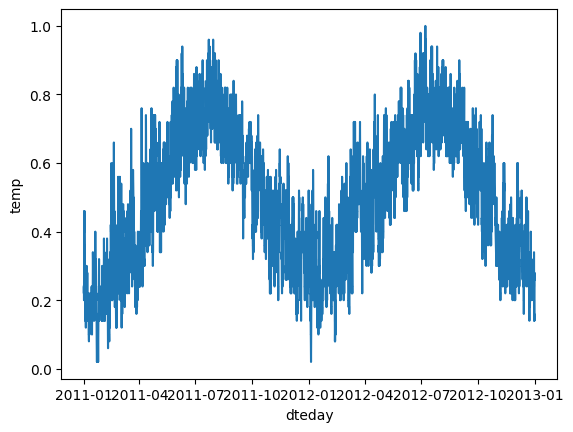

In [62]:
# You can create a plot similar to the one above using the following seaborn syntax
# Note that the seaborn plot is a bit different and requires some customizations (more on this later)
sns.lineplot(x="dteday", y="temp", data=bike_trips)

## Q1.2 (10%):

Use seaborn's `barplot` function to make a bar chart showing
1. the average number of registered riders on each day of the week over the
   entire `bike_trips` dataset.
2. the average number of casual riders on each day of the week over the
   entire `bike_trips` dataset.

Here's a link to the seaborn API: http://seaborn.pydata.org/api.html
.

What trends do you notice? What do you suppose causes these trends?

Notice that `barplot` draws error bars for each category. It uses bootstrapping to make those.

<ipython-input-63-e8d28b05b474>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday, y=avg_registered_per_day, palette='Blues')


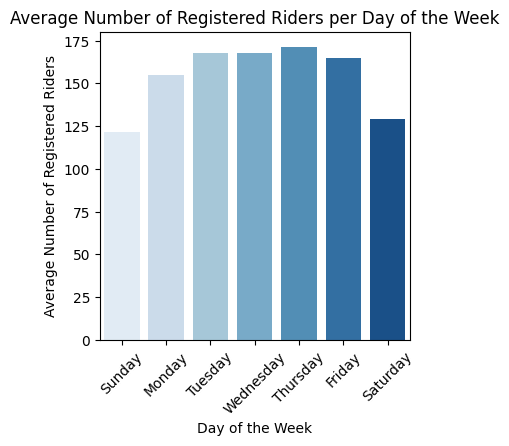

<ipython-input-63-e8d28b05b474>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday, y=avg_casual_per_day, palette='Oranges')


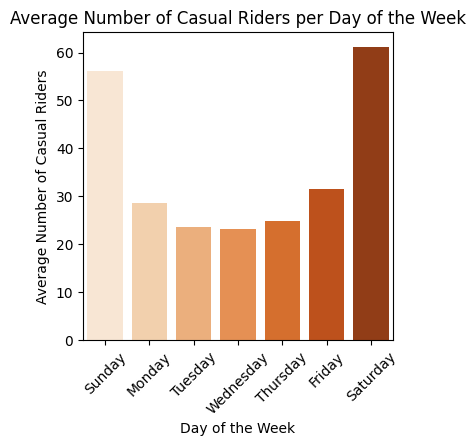

In [63]:
# your code here

# calculate the average number of registered and casual riders on each day of the week
avg_registered_per_day = bike_trips.groupby('weekday')['registered'].mean()
avg_casual_per_day = bike_trips.groupby('weekday')['casual'].mean()

# convert the weekday index to day names
weekday = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# plot the average number of registered riders on each day of the week
plt.figure(figsize=(4, 4))
sns.barplot(x=weekday, y=avg_registered_per_day, palette='Blues')
plt.title('Average Number of Registered Riders per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Registered Riders')
plt.xticks(rotation=45)
plt.show()

# plot the average number of casual riders on each day of the week
plt.figure(figsize=(4, 4))
sns.barplot(x=weekday, y=avg_casual_per_day, palette='Oranges')
plt.title('Average Number of Casual Riders per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Casual Riders')
plt.xticks(rotation=45)
plt.show()

I notice that the average casual rider is highest during the weekend and lowest during the week. The opposite can be said about registered riders as the most registered riders are seen during the week.


## Q1.3 (10%):

Use `seaborn` to make side-by-side boxplots of the number of casual riders (just
checked out a bike for that day) and registered riders (have a bikeshare membership). The `boxplot` function will plot all the columns of the dataframe you pass in.

Once you make the plot, you'll notice that there are many outliers that make the plot hard to see. To mitigate this, change the y-scale to be logarithmic.

That's a plot customization so you'll use `matplotlib`. The `boxplot` function returns a `matplotlib` Axes object which represents a single plot and has a `set_yscale` function.

The result (after customization) should look like **q5.png**.


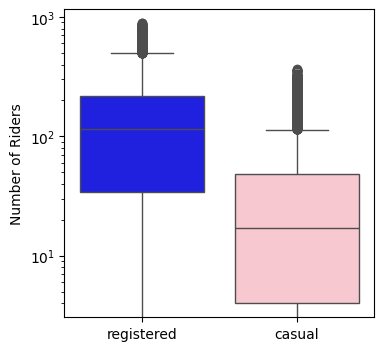

In [64]:
# your code here

plt.figure(figsize=(4, 4))
sea = sns.boxplot(data=bike_trips[['registered', 'casual']], palette=['blue', 'pink'])
sea.set_ylabel('Number of Riders')

sea.set_yscale('log')
plt.show()

# Show plot
plt.show()


## Q1.4 (10%):

Let's take a closer look at the number of registered vs. casual riders.

Use the `lmplot` function to make a scatterplot. Put the number of casual
riders on the x-axis and the number of registered riders on the y-axis.
Each point should correspond to a single row in your `bike_trips` dataframe. Notice that `seaborn` automatically fits a line of best fit to the plot. Does that line seem to be relevant?

You should note that `lmplot` allows you to pass in `fit_line=False` to
avoid plotting lines of best fit when you feel they are unnecessary
or misleading.

There seem to be two main groups in the scatterplot. Let's
see if we can separate them out. Use `lmplot` to make the scatterplot again. This time, use the `hue` parameter
to color points for weekday trips differently from weekend trips. You should
get something that looks like **q1-5.png**.



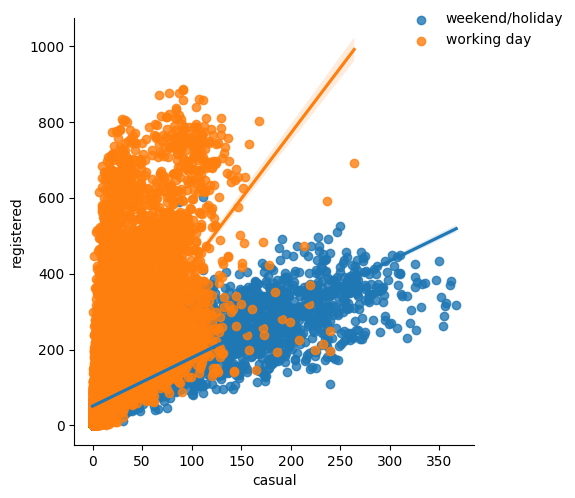

In [65]:
# In your plot, you'll notice that your points are larger than ours. That's
# fine. If you'd like them to be smaller, you can add scatter_kws={'s': 6}
# to your lmplot call. That tells the underlying matplotlib scatter function
# to change the size of the points.

# your code here

ax = sns.lmplot(x="casual",y="registered",data=bike_trips, hue="workingday", legend=True)
legendObj = ax.legend
legendObj.set_title("")
legendObj.texts[0].set_text("weekend/holiday")
legendObj.texts[1].set_text("working day")
sns.move_legend(ax, "upper right")
plt.show()

# Note that the legend for workingday isn't super helpful. 0 in this case
# means "not a working day" and 1 means "working day". Try fixing the legend
# to be more descriptive.
# HINT: ax = sns.lmplot(..., legend=True)
# legendObj = ax.legend # Modify this object

## Want to learn more?

Check out the `seaborn` tutorials on your own time. http://seaborn.pydata.org/tutorial.html

The `matplotlib` tutorial we linked in Question 1 is also a great refresher on common `matplotlib` functions: https://www.labri.fr/perso/nrougier/teaching/matplotlib/

The differences between Python's visualization libraries:
https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/


# Part 2: Self-directed EDA of social media (45%)

This part is intentionally more open-ended and will be graded on the completeness of the plot(s) produced and the insights you gain from them.  The goal here is for you to thoroughly explore a dataset on attitudes towards the internet and whether it's good for society.

_Question 2.0_ is asking you to look at a given visualization and reverse engineer the code that created it. _Question 2.1_ is about _data exploration visualization_ while the other questions are about _data presentation visualization_. Report your two most significant findings (_Q2.2, Q2.3). Each finding should have a _visualization headline_  which highlights the main takeaway in 5-15 words, an informative visualization that supports your finding and a _visualization description_, 100-150 words per finding explaining your assumptions and what you have found. For each visualization in these two findings, create an alternate visualization (Q2.2.2, Q.2.3.2). For example, the visualization headline could be "_Majority of Facebook, Instagram and Snapchat users visit these social networks daily_" with the  bar plot visualization **q2-1.png**.



The file you will work with is `January 8-February 7, 2019 - Core Trends Survey.csv`. The file that contains information about the meaning of each feature is `January 8-February 7, 2019 - Core Trends Survey - Questionnaire.docx`.


Be sure to consider transformations, subsets, correlations, reference markers, and lines/curves-of-best-fit (as covered in Chapter 6 of PTDS) to reveal the relationship that you are wanting to learn more about.  Also be sure to make plots that are appropriate for the variable types.  For completeness, be explicit about any assumptions you make in your analysis.  An exemplary plot will have:

* A title
* Labelled and appropriately scaled axes
* A legend, if applicable
* A carefully selected color scheme
* A main point, accentuated through design choices



## Q2.0 (5%): Reverse Engineer

Your first step is to load the data from `January 8-February 7, 2019 - Core Trends Survey.csv`, and understand what is stored in it. Read the  the survey questionnaire in `January 8-February 7, 2019 - Core Trends Survey - Questionnaire.docx` to understand the meaning of each feature. Your assignment is to replicate the bar plot visualization shown above. Notice the labels on x and y axes as well as the legend of the plot to determine the information needed to construct the plot.

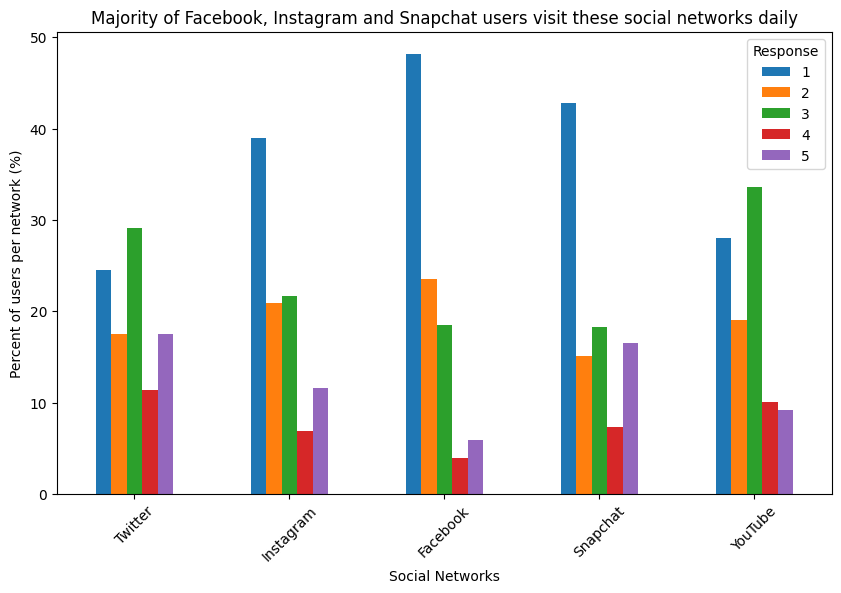

In [39]:
# [your code here]
#HINTS
# 1) Read your dataframe with pandas
# 2) Identify what colums are used for plot above
# 3) Filter required rows and columns necessary for plotting above figure
# 4) Your dataframe is in wide_format. You need to convert to long_format. See pandas.melt documentation
# i.e. originally there is a column each for these five social medias. The column name should be value for a new column.
# 5) Once dataframe is in wide format, filter individuals who responded to the survey
# 6) Use pandas aggregation after groupby to calculate percentage of responses for each social media
# 7) Use seaborn barplot to plot the figure above. Customize with color palette='viridis'
# 8) Add descriptive xlabel, ylabel, and title
# 9) Customize legend if necessary

# 1)
social_media = pd.read_csv('January 8-February 7, 2019 - Core Trends Survey.csv') # read file

# 2)
social_media_columns = ['sns2a', 'sns2b', 'sns2c', 'sns2d', 'sns2e']

# 3)
df = social_media[social_media_columns]

# 4)
df_long = df.melt(var_name='Social Media', value_name='Response') # convert from wide to long format

# 5)
df_long_filtered = df_long[~df_long['Response'].isin([' ', '8', '9'])] # filter out the blanks, 8's, and 9's

# 6)
grouped = df_long_filtered.groupby(['Social Media', 'Response']).size().reset_index(name='Count')

pivot_df = grouped.pivot(index='Social Media', columns='Response', values='Count').fillna(0) # use the pivot function from pandas to get 3 columns to work with

pivot_df_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100 # get the percent of users

# plot
x = [0, 1, 2, 3, 4]
labels = ['Twitter', 'Instagram', 'Facebook', 'Snapchat', 'YouTube']
pivot_df_percent.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Social Networks')
plt.ylabel('Percent of users per network (%)')
plt.title('Majority of Facebook, Instagram and Snapchat users visit these social networks daily')
plt.xticks(x, labels, rotation ='vertical')
plt.xticks(rotation=45)
plt.legend(title='Response')
plt.show()




## Q2.1 (10%): Initial exploration

Run descriptive statistics on the data by considering the EDA key data properties we covered in class. Write a 100-150 word description of your findings. Based on these statistics or other ideas you have, form hypotheses that guide your EDA and visualizations for the last three questions. You need to show at least one visualization but you are welcome to show more.

In [40]:
# Run descriptive statistics on the data and develop ideas on what to explore
# your code here

average_response_rates = pivot_df.mean() # get the average response rates for each social media site

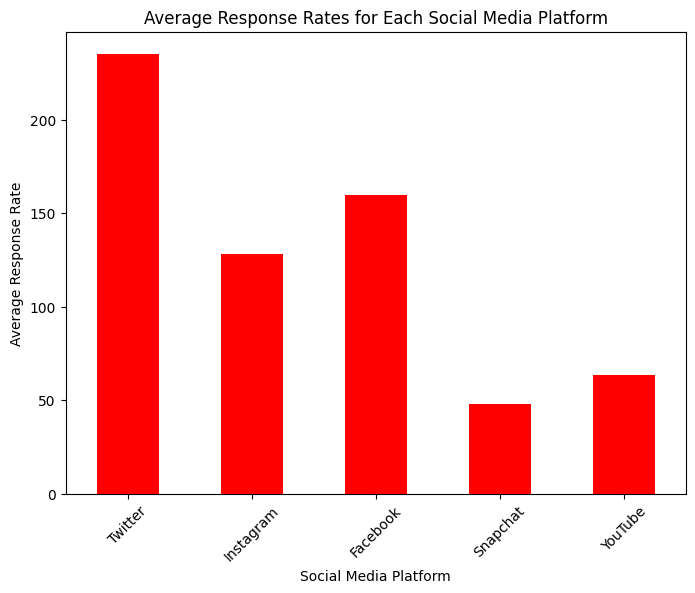

In [41]:
# Create one or more visualizations
# your code here

# plot
x = [0, 1, 2, 3, 4]
labels = ['Twitter', 'Instagram', 'Facebook', 'Snapchat', 'YouTube']
plt.figure(figsize=(8, 6))
average_response_rates.plot(kind='bar', color='red')
plt.xlabel('Social Media Platform')
plt.ylabel('Average Response Rate')
plt.title('Average Response Rates for Each Social Media Platform')
plt.xticks(x, labels, rotation ='vertical')
plt.xticks(rotation=45)
plt.show()

For this question we got the average response rates for each social media site. From this bar chart of average response rates for each of the social media sites we can see that Twitter has the highest then Facebook then Instragram then YouTube then Snapchat. Our hypothesis is is that apps that have more user reviews will have a more accurate interpretation of user uses. Sites that have a higher response rate their bar graphs will be more accurate. This is because a higher sample set corresponds to more accurate data.


## Q2.2 (10%+5%):
### Q2.2.1 (_enter your visualization headline here_)

(Median Response Rates for Each Social Media Platform)

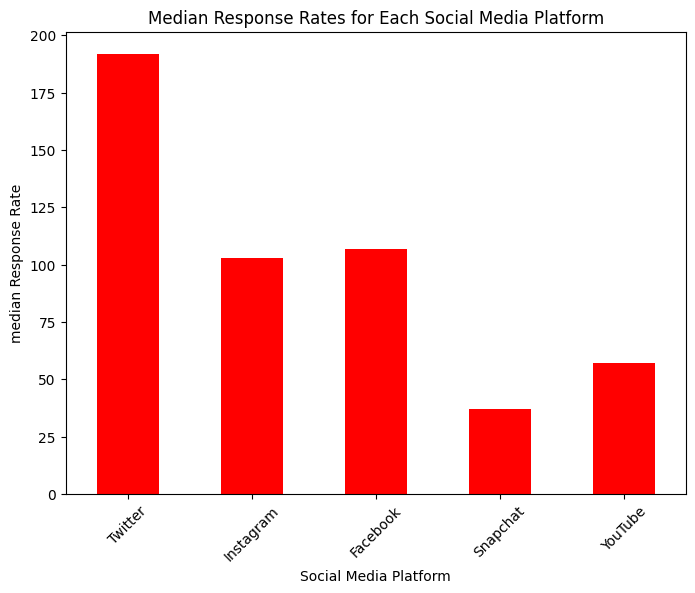

In [42]:
# your Q2.2.1 visualization code should be included here
# make sure to execute it, so we can see your plot in the submitted pdf
# your code here

median_response_rates = pivot_df.median() # get the median response rates for each social media site

# plot
x = [0, 1, 2, 3, 4]
labels = ['Twitter', 'Instagram', 'Facebook', 'Snapchat', 'YouTube']
plt.figure(figsize=(8, 6))
median_response_rates.plot(kind='bar', color='red')
plt.xlabel('Social Media Platform')
plt.ylabel('median Response Rate')
plt.title('Median Response Rates for Each Social Media Platform')
plt.xticks(x, labels, rotation ='vertical')
plt.xticks(rotation=45)
plt.show()

### Q2.2.2 Alternate visualization

Now use your results and visualization from Q2.2.1 and find an alternate way to visualize it. You are encouraged to look at publicly available examples to guide you and can use any visualization package of your choice. Be creative!

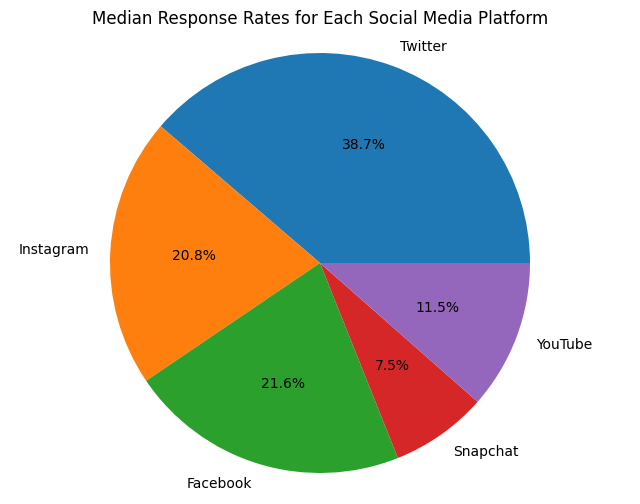

In [43]:
# your Q2.2.2 visualization code should be included here

# change the labels
label_mapping = {'1': 'Twitter', '2': 'Instagram', '3': 'Facebook', '4': 'Snapchat', '5': 'YouTube'}
median_response_rates_renamed = median_response_rates.rename(index=label_mapping)

# plot as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(median_response_rates, labels=median_response_rates_renamed.index, autopct='%1.1f%%')
plt.title('Median Response Rates for Each Social Media Platform')
plt.axis('equal')
plt.show()



## Q2.3 (10%+5%):
### Q2.3.1 (_enter your visualization headline here_)

(Range of response rates across social media networks)

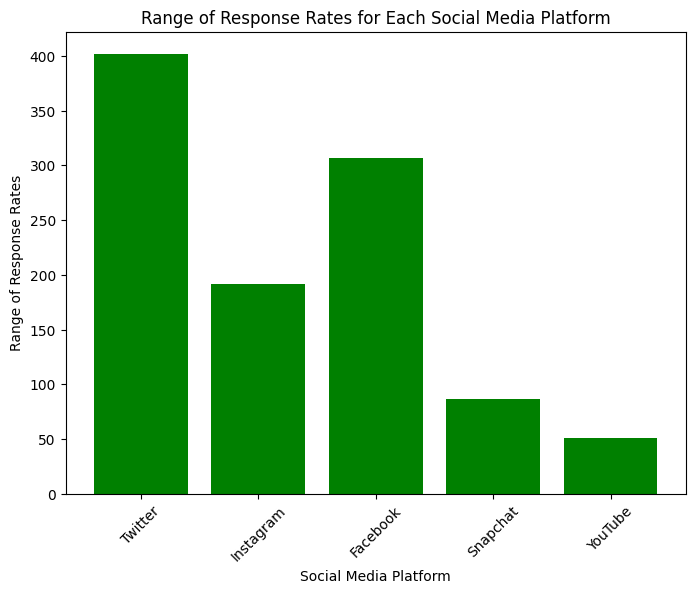

In [44]:
# your Q2.3.1 visualization code should be included here
# make sure to execute it, so we can see your plot in the submitted pdf
# your code here

range_response_rates = pivot_df.max() - pivot_df.min() # get the range of response rates for each social media site

# Plot as bar chart
x = [0, 1, 2, 3, 4]
labels = ['Twitter', 'Instagram', 'Facebook', 'Snapchat', 'YouTube']
plt.figure(figsize=(8, 6))
plt.bar(x, range_response_rates, color='green')
plt.xlabel('Social Media Platform')
plt.ylabel('Range of Response Rates')
plt.title('Range of Response Rates for Each Social Media Platform')
plt.xticks(x, labels, rotation='vertical')
plt.xticks(rotation=45)
plt.show()

### Q2.3.2 Alternate visualization

Now use your results and visualization from Q2.3.1 and find an alternate way to visualize it. You are encouraged to look at publicly available examples to guide you and can use any visualization package of your choice. Be creative!

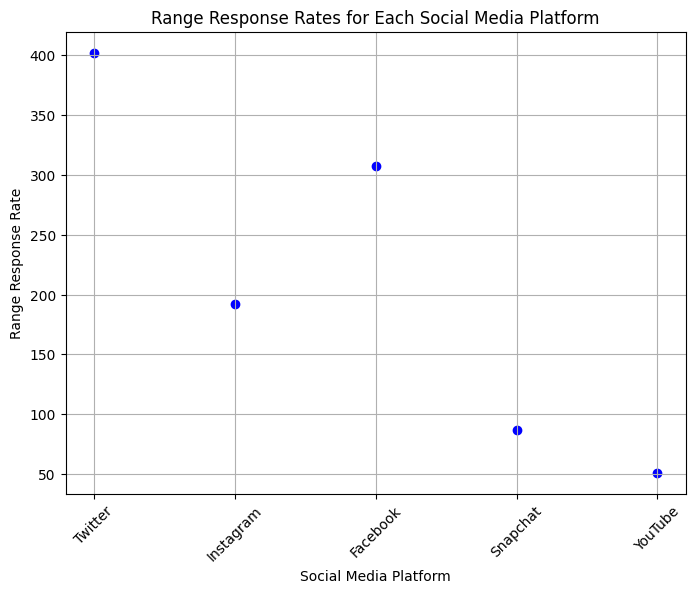

In [45]:
# your Q2.3.2 visualization code should be included here

# change the labels
label_mapping = {'1': 'Twitter', '2': 'Instagram', '3': 'Facebook', '4': 'Snapchat', '5': 'YouTube'}
range_response_rates_renamed = range_response_rates.rename(index=label_mapping)

# plot as a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(range_response_rates_renamed.index, range_response_rates_renamed.values, color='blue')
plt.xlabel('Social Media Platform')
plt.ylabel('Range Response Rate')
plt.title('Range Response Rates for Each Social Media Platform')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Part 3: Error and loss functions (10%)

The last part is about implementing and explore some concepts that we have seen in the class.

## Implement the MSE and MAE
a) Implement MSE (mean Sqaured Error) by your own. Compare with the built-in function (from sklearn.metrics import mean_squared_error) by generating a random sequence of 10 numbers.
b) Implement MAE (mean absolute error) by your own. Compare with the built-in function (from sklearn.metrics import mean_absolute_error) by generating a random sequence of 10 numbers.


In [48]:
# your code here - MSE

from sklearn.metrics import mean_squared_error, mean_absolute_error

# make 10 numbers
np.random.seed(0)
a = np.random.rand(10)
b = np.random.rand(10)

# MSE
def my_MSE(a, y_pred):
    return np.mean((a - b) ** 2)

# calculate MSE
custom_MSE = my_MSE(a, b)
built_in_MSE = mean_squared_error(a, b)

print("my MSE:", custom_MSE)
print("built in MSE:", built_in_MSE)

my MSE: 0.11252771382029314
built in MSE: 0.11252771382029314


In [53]:
# your code here - MAE

# MAE
def my_MAE(y_true, y_pred):
    return np.mean(np.abs(a - b))

# calculate MAE
custom_MAE = my_MAE(a, b)
built_in_MAE = mean_absolute_error(a, b)

print("my MAE:", custom_MAE)
print("built in MAE:", built_in_MAE)

my MAE: 0.29046204135831927
built in MAE: 0.29046204135831927


# Extra Credit (10%)
Explain what the Huber loss is and how it differs from traditional loss functions like Mean Squared Error (MSE). What role does the parameter
 δ play in the Huber loss function? Provide an example scenario where using Huber loss might be beneficial compared to using MSE.

Huber loss is a loss function that is commonly used in regression problems. It is used a lot in situations where the data may contain outliers. It combines properties of the Mean Absolute Error and Mean Squared Error loss functions.

Huber loss differs from traditional loss functions because of two main reasons.
1) More robustness to outliers then MSE. MSE is sensitive to outliers. Huber loss treats errors as quadratic within a certain range and linear beyond that range, which makes Huber loss more robust to outliers then MSE.
2) Easer to optimize then MAE. MAE is not differentiable at every point, Huber loss is.

The parameter δ determines the point where the loss function transitions from quadratic to linear behavior.

An example scenario where using Huber loss might be beneficial compared to using MSE is in housing price prediction. Imagine there are a few houses that are much more expensive then the others. MSE might lead to a model that is overly influenced by these outliers. Huber loss will not have this problem.

This was the last part of Homework 2. Now you need to submit your work following the instructions in the beginning of the notebook and you are done!